In [1]:
#########     计算系数       ###################

m = 1000    ### 资金
price = 3600    ### 价格
shou = 10    ### 每手多少吨/单位
rmb = 10    ### 每手变动1个点多少钱

rrr_temp = m / price / shou * rmb
print(rrr_temp)

0.2777777777777778


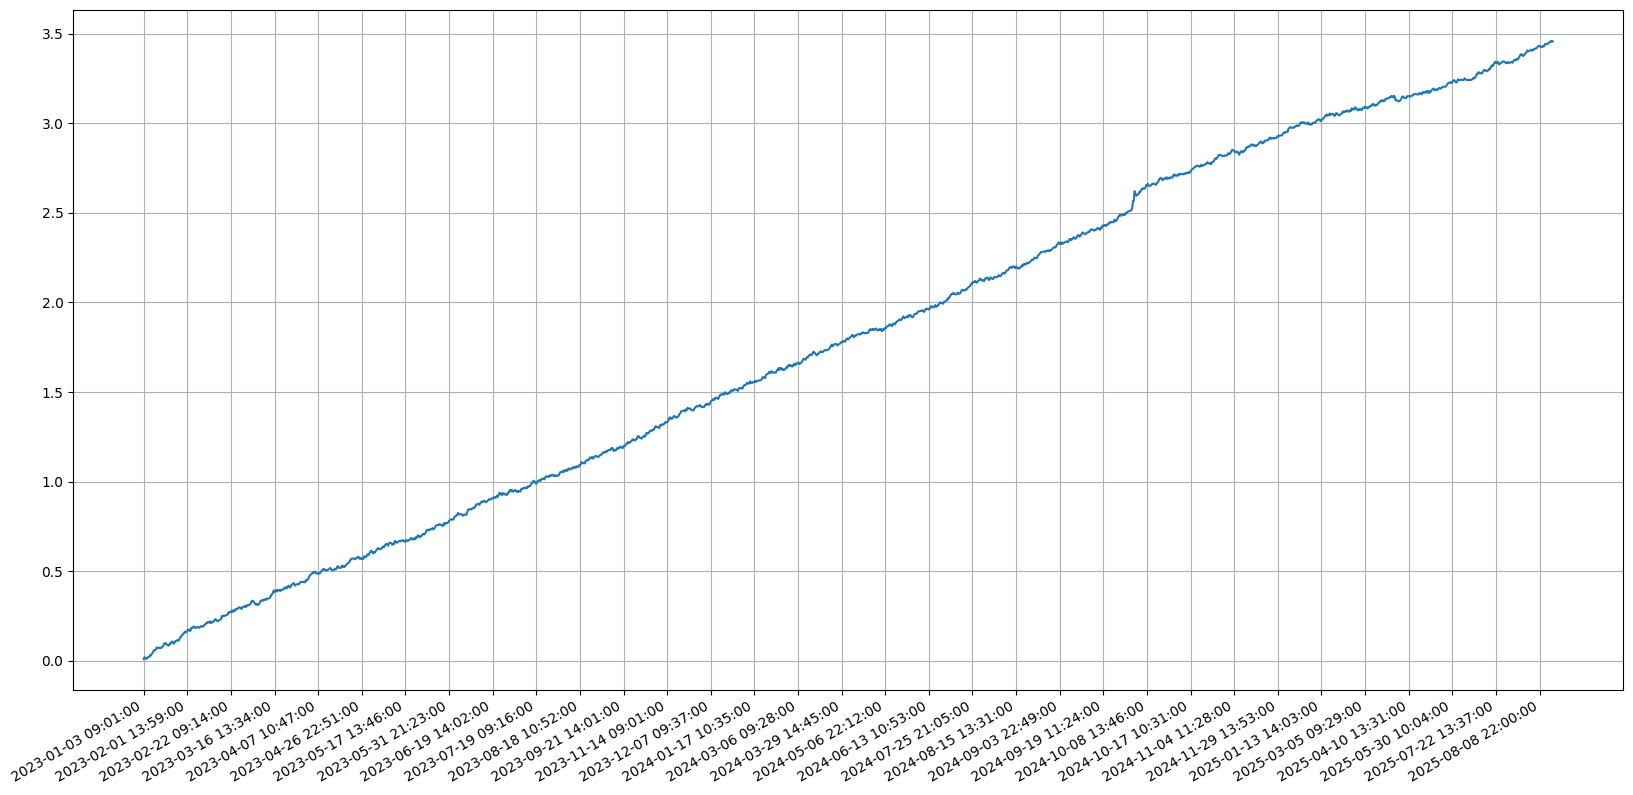

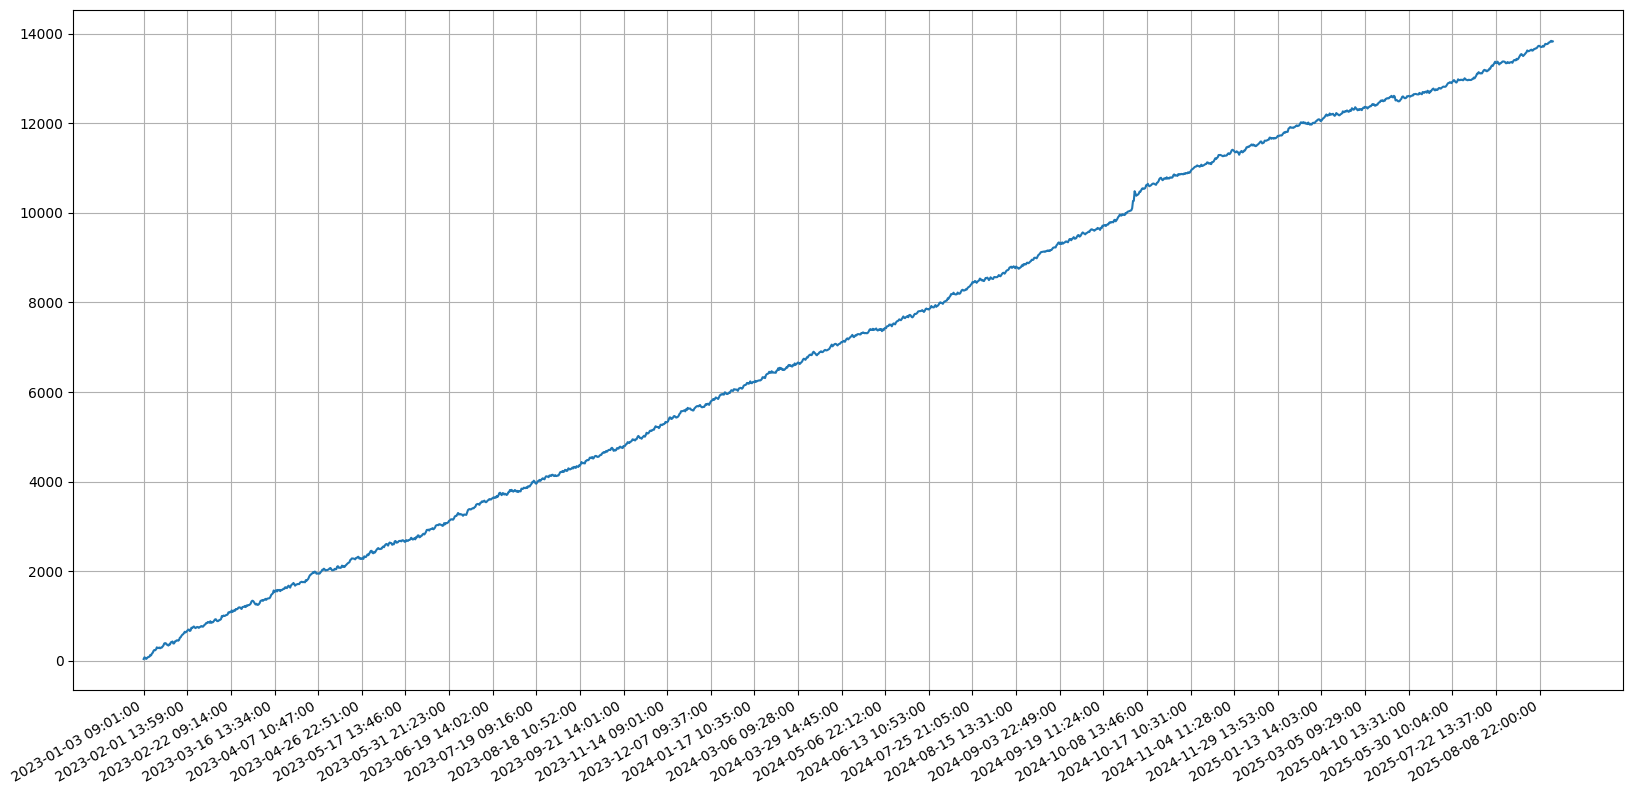

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_name_axis = 'RB99_1m_X_0.2_14861_1713.csv'  #### 轴文件
file_name_label = 'RB99_1m_X_0.2_14861_1713_Label_513.csv'  #### 标签文件

data_1_size = 1713  #### 数据行数
m_size = 32  #### 多少个月
buy = 1  #### 多
sell = 0  #### 空
rrr = 0.25  #### 盈亏系数
m = 1000  #### 总资金

data_1 = pd.read_csv(file_name_axis)
data_2 = pd.read_csv(file_name_label)

data_1_new = data_1.tail(data_1_size + 1).reset_index(drop=True)
data_2_state = data_2['state'].tail(data_1_size + 1).reset_index(drop=True)

data_1_new['low'] = data_2_state
data_1_new['volume'] = data_1_new['close'].diff()
data_1_new = data_1_new.tail(data_1_size).reset_index(drop=True)
data_1_new.to_csv("Show.csv", index=False)

if buy == 0:
    mask = data_1_new['low'] == 1
    data_1_new.loc[mask, 'volume'] *= -1
else:
    mask = data_1_new['low'] == 0
    data_1_new.loc[mask, 'volume'] *= -1

data_1_new['high'] = data_1_new['volume'].cumsum()
data_1_new['open'] = rrr * data_1_new['high'] / m
data_1_new.to_csv("Show_all.csv", index=False)

fig = plt.figure(figsize=(20, 10))
plt.plot(data_1_new['eob'], data_1_new['open'])
plt.xticks(range(0, data_1_size, int(data_1_size / m_size)))
fig.autofmt_xdate()
plt.grid(1)
plt.savefig("Show_r.jpg")
# plt.close()  

fig = plt.figure(figsize=(20, 10))
plt.plot(data_1_new['eob'], data_1_new['high'])
plt.xticks(range(0, data_1_size, int(data_1_size / m_size)))
fig.autofmt_xdate()
plt.grid(1)
plt.savefig("Show_p.jpg")
# plt.close() 
